In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings

from sklearn.datasets import make_classification

warnings.filterwarnings("ignore")
%matplotlib inline

In [41]:
class DecisionStump():

    def __init__(self):
        self.bestvalue = None
        self.bestfeature  = None
        self.bestsplit = None
        self.class_flag = True

    def fit(self, X, y):
        results2 = []
        for f in X.T[:]:
            results2.append(self.calcGini(f, y))
        self.bestvalue, self.bestfeature, self.bestsplit = self.calcBest(results2)
        return self

    def predict(self, X):
        if self.class_flag == True:
            return (X[:,self.bestfeature] < self.bestsplit).astype(int)
        else:
            return (X[:,self.bestfeature] > self.bestsplit).astype(int)

    def calcGini(self, f, y):
        results = []
        for cur in range(math.ceil(np.min(f)), math.floor(np.max(f))):

            # calc left split Gini
            temp_X = f < cur
            result_left, nl, flagl = self.calcSplit(temp_X, y, cur)

            # calc right split Gini
            temp_X = f > cur
            result_right, nr, flagr = self.calcSplit(temp_X, y, cur)

            weighted_result = result_left*nl + result_right*nr
            results.append([weighted_result, cur, flagl])
        return results

    def calcSplit(self, temp_X, y, split):
        n = temp_X.sum()
        n1 = np.logical_and(temp_X, y).astype(int).sum()
        n2 = n - n1

        n1n = n1 / n
        n2n = n2 / n

        result = 1 - (math.pow(n1n, 2) + math.pow(n2n, 2))

        return result, n/temp_X.shape[0], n1 > n2

    def calcBest(self, results2):
        featurenum = 0
        results3 = []
        for i in results2:
            _i = np.array(i)[:, 0]
            argminGini = _i.argmin()
            minGini = _i[_i.argmin()]
            Split = np.array(i)[argminGini, 1]
            class_flag = np.array(i)[argminGini, 2]
            results3.append([argminGini, minGini, Split, featurenum, class_flag])
            featurenum += 1
        results3 = np.array(results3)

        bestfeature = results3[:,1].argmin()
        bestvalue = results3[bestfeature, 1]
        bestSplit = results3[bestfeature, 2]
        
        if results3[bestfeature, 4] == False:
            self.class_flag = False

        return bestvalue, bestfeature, bestSplit


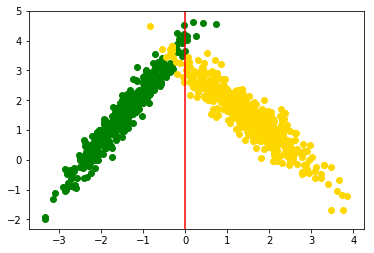

In [59]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0,
    class_sep=1.5,
    random_state=42,
)

n_classes = 2
plot_colors = ['g', 'gold']

clf = DecisionStump().fit(X, y)
Z = clf.predict(X)

# print(y)
# print(Z)

if clf.bestfeature == 0:
    plt.axvline(clf.bestsplit, color='r', linestyle='-')

if clf.bestfeature == 1:
    plt.axhline(clf.bestsplit, color='r', linestyle='-')

for i, color in zip(range(n_classes), ['g', 'gold']):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.Paired);

plt.show()

